In [1]:
from pathlib import Path
import os
import h5py
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import os

Using TensorFlow backend.


In [2]:
batch_size = 32
num_output = 1  # Hint: Since we use sigmoid, our output is a probability
epochs = 5
save_dir = os.path.join(os.getcwd(), 'saved_models')

Images and labels
(641, 224, 224, 3)
(641,)
(576, 224, 224, 3)
(65, 224, 224, 3)


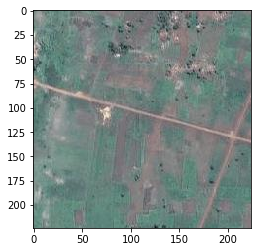

In [3]:
with h5py.File("./data/assorted_images/satellite_images.h5","r") as hf:
    images = hf["data"][...]
    labels = hf["labels"][...]
    
print("Images and labels")
print(images.shape)
print(labels.shape)
plt.imshow(images[1])

# Split into train and validationd data
ratio = 0.9
X_train = images[:int(len(images) * ratio)]
y_train = labels[:int(len(images) * ratio)]

X_test = images[int(len(images) * ratio):]
y_test = labels[int(len(images) * ratio):]

print(X_train.shape)
print(X_test.shape)

In [5]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train[0].shape))
model.add(Activation('sigmoid'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(num_output))
model.add(Activation('sigmoid'))

W0626 16:28:22.836016 4590134720 deprecation_wrapper.py:119] From /Users/Caesar/miniconda2/envs/py37/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0626 16:28:22.865632 4590134720 deprecation_wrapper.py:119] From /Users/Caesar/miniconda2/envs/py37/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0626 16:28:22.918362 4590134720 deprecation_wrapper.py:119] From /Users/Caesar/miniconda2/envs/py37/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [6]:
opt = keras.optimizers.SGD(lr=0.01)

In [7]:
model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

W0626 16:28:28.442433 4590134720 deprecation_wrapper.py:119] From /Users/Caesar/miniconda2/envs/py37/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0626 16:28:28.454231 4590134720 deprecation_wrapper.py:119] From /Users/Caesar/miniconda2/envs/py37/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0626 16:28:28.465441 4590134720 deprecation.py:323] From /Users/Caesar/miniconda2/envs/py37/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [ ]:
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),
          shuffle=True)

W0626 16:28:28.823869 4590134720 deprecation_wrapper.py:119] From /Users/Caesar/miniconda2/envs/py37/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 576 samples, validate on 65 samples
Epoch 1/5
384/576 [===================>..........] - ETA: 21s - loss: 1.0698 - acc: 0.7422